# Clinical Deterioration Prediction Model - Preprocessing I


## Extract data from MIMIC III Datasets and Organize by Patient. 

## Data Source 

For this project, I used publicly available Electronic Health Records (EHRs) datasets. The MIT Media Lab for Computational Physiology has developed MIMIC-IIIv1.4 dataset based on 46,520 patients who stayed in critical care units of the Beth Israel Deaconess Medical Center of Boston between 2001 and 2012. MIMIC-IIIv1.4 dataset is freely available to researchers across the world. A formal request should be made directly to www.mimic.physionet.org, to gain acess to the data. There is a required course on human research ‘Data or Specimens Only Research’ prior to data acess request. I have secured one here -www.citiprogram.org/verify/?kb6607b78-5821-4de5-8cad-daf929f7fbbf-33486907

The dataset has 26 relational tables including patient’s hospital admission, callout information when patient was ready for discharge, caregiver information, electronic charted events including vital signs and any additional information relevant to patient care, patient demographic data, list of services the patient was admitted or transferred under,  ICU stay types, diagnoses types, laboratory measurments, microbiology tests and sensitivity, prescription data and billing information. 

Although I have full access to the MIMIC-IIIv1.4 datasets, I can not share any part of the data publicly. If you are interested to learn more about the data, there is a MIMIC III Demo dataset based on 100 patients https://mimic.physionet.org/gettingstarted/demo/. If you are interested to requesting access to the data - https://mimic.physionet.org/gettingstarted/access/. 



In [13]:
import os
import pandas as pd
import numpy as np
import random
import sys
import csv

In [14]:
os.getcwd()

'C:\\Users\\abebu\\Google Drive\\mimic-iii-clinical-database-1.4'

In [15]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")

In [16]:
pt=pd.read_csv('PATIENTS.csv', header=0, index_col=0)
pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46520 entries, 234 to 31844
Data columns (total 7 columns):
SUBJECT_ID     46520 non-null int64
GENDER         46520 non-null object
DOB            46520 non-null object
DOD            15759 non-null object
DOD_HOSP       9974 non-null object
DOD_SSN        13378 non-null object
EXPIRE_FLAG    46520 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


In [17]:
demo=pt[['SUBJECT_ID', 'GENDER']]

In [18]:
pt.DOB = pd.to_datetime(pt.DOB)
pt.DOD = pd.to_datetime(pt.DOD)
pt.head()

,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
ROW_ID,,,,,,,
234,249,F,2075-03-13,NaT,NaN,NaN,0
235,250,F,2164-12-27,2188-11-22,2188-11-22 00:00:00,NaN,1
236,251,M,2090-03-15,NaT,NaN,NaN,0
237,252,M,2078-03-06,NaT,NaN,NaN,0
238,253,F,2089-11-26,NaT,NaN,NaN,0


In [19]:
adm=pd.read_csv("ADMISSIONS.csv", header=0, index_col=0) 
adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 21 to 58598
Data columns (total 18 columns):
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(4), object(14)
memory usage: 8.5+ MB


In [20]:
demo1 = adm[['SUBJECT_ID', 'HADM_ID', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']]

In [21]:
adm = adm[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'HOSPITAL_EXPIRE_FLAG']]
adm.ADMITTIME = pd.to_datetime(adm.ADMITTIME)
adm.DISCHTIME = pd.to_datetime(adm.DISCHTIME)
adm.DEATHTIME = pd.to_datetime(adm.DEATHTIME)
adm.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,HOSPITAL_EXPIRE_FLAG
ROW_ID,,,,,,,
21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,0
22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,0
23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,0
24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,0
25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,0


In [22]:
icu=pd.read_csv("ICUSTAYS.csv", header=0, index_col=0) 
icu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61532 entries, 365 to 59810
Data columns (total 11 columns):
SUBJECT_ID        61532 non-null int64
HADM_ID           61532 non-null int64
ICUSTAY_ID        61532 non-null int64
DBSOURCE          61532 non-null object
FIRST_CAREUNIT    61532 non-null object
LAST_CAREUNIT     61532 non-null object
FIRST_WARDID      61532 non-null int64
LAST_WARDID       61532 non-null int64
INTIME            61532 non-null object
OUTTIME           61522 non-null object
LOS               61522 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 5.6+ MB


In [23]:
icu.INTIME = pd.to_datetime(icu.INTIME)
icu.OUTTIME = pd.to_datetime(icu.OUTTIME)
icu.ICUSTAY_ID.isnull().sum()

0

In [24]:
icu=icu[['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'INTIME', 'OUTTIME', 'LOS']]

In [25]:
def subj_merge(table1, table2):
    return table1.merge(table2, how='inner', left_on=['SUBJECT_ID'], right_on=['SUBJECT_ID'])

In [26]:
adm=subj_merge(adm, pt)
adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 13 columns):
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null datetime64[ns]
DISCHTIME               58976 non-null datetime64[ns]
DEATHTIME               5854 non-null datetime64[ns]
ADMISSION_TYPE          58976 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
GENDER                  58976 non-null object
DOB                     58976 non-null datetime64[ns]
DOD                     22586 non-null datetime64[ns]
DOD_HOSP                15071 non-null object
DOD_SSN                 19069 non-null object
EXPIRE_FLAG             58976 non-null int64
dtypes: datetime64[ns](5), int64(4), object(4)
memory usage: 6.3+ MB


In [27]:
adm=adm.drop(['DEATHTIME', 'DOD_SSN'], axis=1)

In [28]:
demo=subj_merge(demo, demo1)
demo

,SUBJECT_ID,GENDER,HADM_ID,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY
0,249,F,116935,Medicare,CATHOLIC,DIVORCED,WHITE
1,249,F,149546,Medicare,CATHOLIC,DIVORCED,WHITE
2,249,F,158975,Medicare,CATHOLIC,DIVORCED,WHITE
3,250,F,124271,Self Pay,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN
4,251,M,117937,Private,OTHER,NaN,UNKNOWN/NOT SPECIFIED
...,...,...,...,...,...,...,...
58971,44089,M,165748,Medicare,GREEK ORTHODOX,MARRIED,WHITE
58972,44115,F,163623,Private,CATHOLIC,MARRIED,WHITE
58973,44123,F,116395,Medicare,CATHOLIC,SEPARATED,WHITE
58974,44126,F,183530,Private,NOT SPECIFIED,MARRIED,WHITE


In [11]:
demo.to_csv('demography.csv')

In [29]:
def adm_merge(table1, table2):
    return table1.merge(table2, how='left', left_on=['SUBJECT_ID','HADM_ID'], right_on=['SUBJECT_ID','HADM_ID'])

In [30]:
icu=adm_merge(icu, adm)

In [31]:
icu

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,ADMISSION_TYPE,HOSPITAL_EXPIRE_FLAG,GENDER,DOB,DOD,DOD_HOSP,EXPIRE_FLAG
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,2198-02-11 13:40:00,2198-02-18 03:55:00,EMERGENCY,1,F,2132-02-21,2198-02-18,2198-02-18 00:00:00,1
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,2170-11-05 11:04:00,2170-11-27 18:00:00,EMERGENCY,0,M,2130-09-30,NaT,NaN,0
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,2128-06-23 18:26:00,2128-06-27 12:31:00,ELECTIVE,0,M,2048-05-26,NaT,NaN,0
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,2120-08-07 18:56:00,2120-08-20 16:00:00,EMERGENCY,0,F,2074-11-30,NaT,NaN,0
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,2186-12-25 21:06:00,2187-01-02 14:57:00,EMERGENCY,0,M,2119-11-21,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,94944,143774,201233,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894,2104-04-11 18:08:00,2104-04-20 16:16:00,EMERGENCY,0,M,2027-03-02,NaT,NaN,0
61528,94950,123750,283653,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942,2155-12-07 22:37:00,2155-12-12 10:10:00,EMERGENCY,0,F,1855-12-07,NaT,NaN,0
61529,94953,196881,241585,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259,2160-03-03 07:15:00,2160-03-04 12:48:00,ELECTIVE,0,F,2107-01-29,2162-01-05,NaN,1
61530,94954,118475,202802,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346,2183-03-25 07:15:00,2183-04-01 17:07:00,ELECTIVE,0,F,2115-05-23,NaT,NaN,0


In [33]:
#calculate age
import datetime as DT
icu['ADMITTIME'] = pd.to_datetime(icu['ADMITTIME']).dt.date
icu['DOB'] = pd.to_datetime(icu['DOB']).dt.date

#icu['AGE'] = ((icu['ADMITTIME']-icu['DOB']).dt.days) //365
icu['AGE'] = icu.apply(lambda e: (e['ADMITTIME'] - e['DOB']).days/365, axis=1)
icu

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,ADMISSION_TYPE,HOSPITAL_EXPIRE_FLAG,GENDER,DOB,DOD,DOD_HOSP,EXPIRE_FLAG,AGE
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,2198-02-11,2198-02-18 03:55:00,EMERGENCY,1,F,2132-02-21,2198-02-18,2198-02-18 00:00:00,1,66.019178
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,2170-11-05,2170-11-27 18:00:00,EMERGENCY,0,M,2130-09-30,NaT,NaN,0,40.126027
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,2128-06-23,2128-06-27 12:31:00,ELECTIVE,0,M,2048-05-26,NaT,NaN,0,80.128767
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,2120-08-07,2120-08-20 16:00:00,EMERGENCY,0,F,2074-11-30,NaT,NaN,0,45.715068
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,2186-12-25,2187-01-02 14:57:00,EMERGENCY,0,M,2119-11-21,NaT,NaN,0,67.139726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61527,94944,143774,201233,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894,2104-04-11,2104-04-20 16:16:00,EMERGENCY,0,M,2027-03-02,NaT,NaN,0,77.161644
61528,94950,123750,283653,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942,2155-12-07,2155-12-12 10:10:00,EMERGENCY,0,F,1855-12-07,NaT,NaN,0,300.200000
61529,94953,196881,241585,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259,2160-03-03,2160-03-04 12:48:00,ELECTIVE,0,F,2107-01-29,2162-01-05,NaN,1,53.128767
61530,94954,118475,202802,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346,2183-03-25,2183-04-01 17:07:00,ELECTIVE,0,F,2115-05-23,NaT,NaN,0,67.884932


In [34]:
icu.describe()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS,HOSPITAL_EXPIRE_FLAG,EXPIRE_FLAG,AGE
count,61532.000000,61532.000000,61532.000000,61522.000000,61532.000000,61532.000000,61532.000000
mean,33888.605912,149954.470649,249962.710248,4.917972,0.107408,0.393145,64.925951
std,28127.690913,28898.895904,28890.574867,9.638784,0.309633,0.488453,56.951788
min,2.000000,100001.000000,200001.000000,0.000100,0.000000,0.000000,0.000000
25%,12047.500000,124933.750000,224935.500000,1.108025,0.000000,0.000000,44.374658
50%,24280.500000,149911.500000,249940.000000,2.092250,0.000000,0.000000,62.112329
75%,54191.500000,174997.250000,274972.500000,4.483175,0.000000,1.000000,76.101370
max,99999.000000,199999.000000,299999.000000,173.072500,1.000000,1.000000,311.767123


In [20]:
charts=pd.read_csv("charts_ioi.csv", header=0, index_col=0) 

C:\Users\abebu\DS\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\abebu\DS\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
charts

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM
1,36,165660,241249.0,223835,2134-05-12 12:00:00,100,100.0,NaN
9,36,165660,241249.0,220224,2134-05-12 12:35:00,58,58.0,mmHg
15,36,165660,241249.0,220045,2134-05-12 13:00:00,86,86.0,bpm
16,36,165660,241249.0,220179,2134-05-12 13:00:00,137,137.0,mmHg
28,36,165660,241249.0,220045,2134-05-12 14:00:00,85,85.0,bpm
...,...,...,...,...,...,...,...,...
330712398,99781,167791,239830.0,223900,2133-07-28 04:37:00,Oriented,5.0,NaN
330712399,99781,167791,239830.0,223901,2133-07-28 04:37:00,Obeys Commands,6.0,NaN
330712445,99781,167791,239830.0,220739,2133-07-28 08:00:00,Spontaneously,4.0,NaN
330712456,99781,167791,239830.0,223900,2133-07-28 08:00:00,Oriented,5.0,NaN


In [32]:
#charts=charts[charts['SUBJECT_ID'].isin(adm_sample_list)]
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316346 entries, 1 to 330712457
Data columns (total 8 columns):
SUBJECT_ID    int64
HADM_ID       int64
ICUSTAY_ID    float64
ITEMID        int64
CHARTTIME     object
VALUE         object
VALUENUM      float64
VALUEUOM      object
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ GB


In [33]:
charts.sort_values('SUBJECT_ID', ascending=True)
charts

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM
1,36,165660,241249.0,223835,2134-05-12 12:00:00,100,100.0,NaN
9,36,165660,241249.0,220224,2134-05-12 12:35:00,58,58.0,mmHg
15,36,165660,241249.0,220045,2134-05-12 13:00:00,86,86.0,bpm
16,36,165660,241249.0,220179,2134-05-12 13:00:00,137,137.0,mmHg
28,36,165660,241249.0,220045,2134-05-12 14:00:00,85,85.0,bpm
...,...,...,...,...,...,...,...,...
330712398,99781,167791,239830.0,223900,2133-07-28 04:37:00,Oriented,5.0,NaN
330712399,99781,167791,239830.0,223901,2133-07-28 04:37:00,Obeys Commands,6.0,NaN
330712445,99781,167791,239830.0,220739,2133-07-28 08:00:00,Spontaneously,4.0,NaN
330712456,99781,167791,239830.0,223900,2133-07-28 08:00:00,Oriented,5.0,NaN


In [34]:
charts=charts.dropna(how='any', subset=['VALUENUM']) # This removes rows with null values for VALUENUM column (a total of 190,141 records removed)

In [35]:
d_c=pd.read_csv('D_ITEMS.csv', header=0, index_col=0) 
d_c=d_c[['ITEMID', 'LABEL', 'CATEGORY']]
d_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 457 to 14522
Data columns (total 3 columns):
ITEMID      12487 non-null int64
LABEL       12483 non-null object
CATEGORY    6049 non-null object
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [36]:
def item_merge(table1, table2):
    return table1.merge(table2, how='inner', left_on=['ITEMID'], right_on=['ITEMID'])

In [37]:
charts=item_merge(charts, d_c)

In [38]:
charts

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
0,36,165660,241249.0,223835,2134-05-12 12:00:00,100,100.0,NaN,Inspired O2 Fraction,Respiratory
1,34,144319,290505.0,223835,2191-02-23 07:31:00,60,60.0,NaN,Inspired O2 Fraction,Respiratory
2,36,165660,241249.0,223835,2134-05-12 07:09:00,100,100.0,NaN,Inspired O2 Fraction,Respiratory
3,34,144319,290505.0,223835,2191-02-23 11:00:00,60,60.0,NaN,Inspired O2 Fraction,Respiratory
4,36,165660,241249.0,223835,2134-05-13 16:00:00,50,50.0,NaN,Inspired O2 Fraction,Respiratory
...,...,...,...,...,...,...,...,...,...,...
25126200,99781,167791,239830.0,223901,2133-07-24 19:00:00,No response,1.0,NaN,GCS - Motor Response,Neurological
25126201,99781,167791,239830.0,223901,2133-07-25 20:00:00,Obeys Commands,6.0,NaN,GCS - Motor Response,Neurological
25126202,99781,167791,239830.0,223901,2133-07-27 00:00:00,Obeys Commands,6.0,NaN,GCS - Motor Response,Neurological
25126203,99781,167791,239830.0,223901,2133-07-28 04:37:00,Obeys Commands,6.0,NaN,GCS - Motor Response,Neurological


In [41]:
charts['LABEL'] = charts['LABEL'].astype('category')

In [42]:
charts['LABEL'].cat.set_categories(['ART BP Systolic', 'NBP [Systolic]', 'Arterial BP [Systolic]', 
        'BP Cuff [Systolic]', 'Manual BP [Systolic]', 'BP UAC [Systolic]', 'BP Right Leg [Systolic]',
        'Pulmonary Artery Pressure systolic', 'Non Invasive Blood Pressure systolic', 'Arterial Blood Pressure systolic', 
        'Heart Rate', 'Heart Rate Alarm - Low', 'Heart Rhythm', 'Heart rate Alarm - High', 
        'WBC   (4-11,000)', 'WBC (4-11,000)', 'WBC 4.0-11.0', 'WBC', 
        'BUN', 'BUN    (6-20)', 'BUN (6-20)', 
        'Potassium (whole blood)', 'Potassium  (3.5-5.3)', 'Potassium (3.5-5.3)',
        'Arterial O2 pressure', 'Arterial PaO2', 'Inspired O2 Fraction', 'FIO2', 'FIO2 Alarm [High]', 'FIO2 Alarm [Low]',
        'FIO2 Alarm-High', 'FIO2 [Meas]', 
        'Blood Temperature CCO (C)',
        'Temperature Fahrenheit', 'Temperature Celsius', 'Skin [Temperature]', 'Temperature C', 'Temperature C (calc)',
        'Temperature F', 'Temperature F (calc)',
        'Sodium (serum)', 'Sodium', 'Sodium  (135-148)', 'Sodium (135-148)', 'Sodium (whole blood)', 
        'HCO3 (serum)',
        'Total Bilirubin', 'Total Bili', 'Direct Bili (0-0.3)',
        'GCS - Eye Opening', 'GCS - Motor Response', 'GCS - Verbal Response', 'GCS Total', ], inplace=True) 

In [43]:
charts.groupby("LABEL")['VALUENUM'].count().sort_values().plot(kind='bar', color='green')

In [44]:
# convert from Temperature Celsius Temperature Fahrenheit
charts[charts.LABEL.isin(['Temp Axillary [F]','Temp Rectal [F]',
                          'Blood Temperature CCO (C)', 'Temperature Fahrenheit', 'Temperature Celsius', 'Skin [Temperature]', 
                          'Temperature C', 'Temperature C (calc)', 'Temperature F', 'Temperature F (calc)',])]
charts.loc[charts.LABEL== 'Temperature Fahrenheit', 'VALUENUM'] = ((charts.VALUENUM -32) * 5./9)
charts.loc[charts.LABEL== 'Temperature F', 'VALUENUM'] = ((charts.VALUENUM -32) * 5./9)
charts.loc[charts.LABEL== 'Temperature F (calc)', 'VALUENUM'] = ((charts.VALUENUM -32) * 5./9)
charts.loc[charts.LABEL== 'Temp Axillary [F]', 'VALUENUM'] = ((charts.VALUENUM -32) * 5./9)
charts.loc[charts.LABEL== 'Temp Rectal [F]', 'VALUENUM'] = ((charts.VALUENUM -32) * 5./9)


In [45]:
# now that both 'Temperature Fahrenheit', 'Temperature Celsius' have the same unit, lets make sure they have the same label name. 
charts['LABEL'].mask(charts['LABEL']== 'Temperature Fahrenheit', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temperature F', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temperature F (calc)', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Blood Temperature CCO (C)', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Skin [Temperature]', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temperature C', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temperature C (calc)', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temp Axillary [F]', 'Temperature Celsius', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Temp Rectal [F]', 'Temperature Celsius', inplace=True)
charts[charts.LABEL.isin(['Temperature Celsius'])]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
4751003,36,165660,241249.0,223761,2134-05-12 16:00:00,97.3,36.277778,?F,Temperature Celsius,Routine Vital Signs
4751004,34,144319,290505.0,223761,2191-02-23 08:00:00,97,36.111111,?F,Temperature Celsius,Routine Vital Signs
4751005,23,124321,234044.0,223761,2157-10-22 16:00:00,98.4,36.888889,?F,Temperature Celsius,Routine Vital Signs
4751006,23,124321,234044.0,223761,2157-10-21 12:05:00,95.8,35.444444,?F,Temperature Celsius,Routine Vital Signs
4751007,23,124321,234044.0,223761,2157-10-21 14:00:00,97.2,36.222222,?F,Temperature Celsius,Routine Vital Signs
...,...,...,...,...,...,...,...,...,...,...
16668142,32810,189751,204923.0,679,2100-09-19 07:00:00,99.860000610351562,37.700000,Deg. F,Temperature Celsius,NaN
16668143,32810,189751,204923.0,679,2100-09-20 03:00:00,97.519996643066406,36.399998,Deg. F,Temperature Celsius,NaN
16668144,32805,124834,252568.0,679,2182-11-21 11:00:00,99.860000610351562,37.700000,Deg. F,Temperature Celsius,NaN
16668145,32805,124834,252568.0,679,2182-11-22 08:00:00,98.599998474121094,36.999999,Deg. F,Temperature Celsius,NaN


In [46]:
charts[charts.LABEL.isin(['ART BP Systolic', 'NBP [Systolic]', 'Arterial BP [Systolic]', 
        'BP Cuff [Systolic]', 'Manual BP [Systolic]', 'BP UAC [Systolic]', 'BP Right Leg [Systolic]',
        'Pulmonary Artery Pressure systolic', 'Non Invasive Blood Pressure systolic', 'Arterial Blood Pressure systolic'])]
charts['LABEL'].mask(charts['LABEL']== 'NBP [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Arterial BP [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'BP Cuff [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Manual BP [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'BP UAC [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'BP Right Leg [Systolic]', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Pulmonary Artery Pressure systolic', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Non Invasive Blood Pressure systolic', 'ART BP Systolic', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Arterial Blood Pressure systolic', 'ART BP Systolic', inplace=True)
charts[charts.LABEL.isin(['ART BP Systolic'])]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
3460515,36,165660,241249.0,220179,2134-05-12 13:00:00,137,137.0,mmHg,ART BP Systolic,Routine Vital Signs
3460516,36,165660,241249.0,220179,2134-05-12 14:00:00,118,118.0,mmHg,ART BP Systolic,Routine Vital Signs
3460517,36,165660,241249.0,220179,2134-05-12 15:00:00,130,130.0,mmHg,ART BP Systolic,Routine Vital Signs
3460518,36,165660,241249.0,220179,2134-05-12 16:00:00,117,117.0,mmHg,ART BP Systolic,Routine Vital Signs
3460519,34,144319,290505.0,220179,2191-02-23 07:34:00,135,135.0,mmHg,ART BP Systolic,Routine Vital Signs
...,...,...,...,...,...,...,...,...,...,...
23248183,32324,171518,207607.0,3325,2164-12-28 02:00:00,49,49.0,Breath,ART BP Systolic,NaN
23248184,32324,171518,207607.0,3325,2164-12-28 03:00:00,43,43.0,Breath,ART BP Systolic,NaN
23248185,32324,171518,207607.0,3325,2164-12-28 04:00:00,49,49.0,Breath,ART BP Systolic,NaN
23248186,32324,171518,207607.0,3325,2164-12-28 05:00:00,49,49.0,Breath,ART BP Systolic,NaN


In [47]:
charts[charts.LABEL.isin(['Heart Rate', 'Heart Rate Alarm - Low','Heart rate Alarm - High'])]

charts['LABEL'].mask(charts['LABEL']== 'Heart Rate Alarm - Low', 'Heart Rate', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Heart rate Alarm - High', 'Heart Rate', inplace=True)
charts[charts.LABEL.isin(['Heart Rate'])]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
698290,36,165660,241249.0,220045,2134-05-12 13:00:00,86,86.0,bpm,Heart Rate,Routine Vital Signs
698291,36,165660,241249.0,220045,2134-05-12 14:00:00,85,85.0,bpm,Heart Rate,Routine Vital Signs
698292,36,165660,241249.0,220045,2134-05-12 15:00:00,87,87.0,bpm,Heart Rate,Routine Vital Signs
698293,36,165660,241249.0,220045,2134-05-12 16:00:00,91,91.0,bpm,Heart Rate,Routine Vital Signs
698294,34,144319,290505.0,220045,2191-02-23 07:34:00,44,44.0,bpm,Heart Rate,Routine Vital Signs
...,...,...,...,...,...,...,...,...,...,...
13435640,32786,165351,275017.0,211,2152-11-16 14:45:00,55,55.0,BPM,Heart Rate,NaN
13435641,32775,128184,292368.0,211,2200-09-02 02:00:00,96,96.0,BPM,Heart Rate,NaN
13435642,32775,128184,292368.0,211,2200-09-02 21:00:00,87,87.0,BPM,Heart Rate,NaN
13435643,32777,105007,202322.0,211,2113-10-12 12:15:00,78,78.0,BPM,Heart Rate,NaN


In [48]:
charts[charts.LABEL.isin(['Potassium (whole blood)', 'Potassium  (3.5-5.3)', 'Potassium (3.5-5.3)', 'Potassium (serum)'])]
charts['LABEL'].mask(charts['LABEL']== 'Potassium  (3.5-5.3)', 'Potassium (whole blood)', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Potassium (3.5-5.3)', 'Potassium (whole blood)', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Potassium (serum)', 'Potassium (whole blood)', inplace=True)
#cd.VALUEUOM.fillna('mmHg', inplace=True) # this is not necessary as all have the same unit (mmHg)
charts[charts.LABEL.isin(['Potassium (whole blood)'])]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
7493983,107,182383,252542.0,227464,2121-11-30 19:47:00,6,6.0,mEq/L,Potassium (whole blood),Labs
7493984,109,147469,253139.0,227464,2141-06-11 14:19:00,4.3,4.3,mEq/L,Potassium (whole blood),Labs
7493985,109,172335,262652.0,227464,2141-09-21 04:40:00,5,5.0,mEq/L,Potassium (whole blood),Labs
7493986,109,126055,236124.0,227464,2141-10-15 20:03:00,4,4.0,mEq/L,Potassium (whole blood),Labs
7493987,109,158995,241296.0,227464,2142-02-25 17:10:00,5.4,5.4,mEq/L,Potassium (whole blood),Labs
...,...,...,...,...,...,...,...,...,...,...
19117629,32651,157077,242024.0,3792,2176-12-09 18:30:00,5.6,5.6,NaN,Potassium (whole blood),Chemistry
19117630,32651,157077,242024.0,3792,2176-11-11 01:00:00,4.5,4.5,NaN,Potassium (whole blood),Chemistry
19117631,32651,157077,242024.0,3792,2176-11-13 01:15:00,5.1,5.1,NaN,Potassium (whole blood),Chemistry
19117632,32651,157077,242024.0,3792,2176-11-15 03:55:00,5.1,5.1,NaN,Potassium (whole blood),Chemistry


In [49]:
charts[charts.LABEL.isin(['Sodium (serum)', 'Sodium', 'Sodium  (135-148)', 'Sodium (135-148)', 'Sodium (whole blood)'])]
charts['LABEL'].mask(charts['LABEL']== 'Sodium', 'Sodium (serum)', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Sodium  (135-148)', 'Sodium (serum)', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Sodium (135-148)', 'Sodium (serum)', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Sodium (whole blood)', 'Sodium (serum)', inplace=True)
charts[charts.LABEL.isin(['Sodium (serum)'])]
 

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
6988199,23,124321,234044.0,220645,2157-10-21 14:40:00,144,144.0,mEq/L,Sodium (serum),Labs
6988200,23,124321,234044.0,220645,2157-10-22 03:21:00,144,144.0,mEq/L,Sodium (serum),Labs
6988201,36,165660,241249.0,220645,2134-05-12 08:33:00,139,139.0,mEq/L,Sodium (serum),Labs
6988202,34,144319,290505.0,220645,2191-02-23 10:48:00,139,139.0,mEq/L,Sodium (serum),Labs
6988203,34,144319,290505.0,220645,2191-02-24 04:32:00,142,142.0,mEq/L,Sodium (serum),Labs
...,...,...,...,...,...,...,...,...,...,...
19133381,32651,157077,242024.0,3803,2176-12-09 18:30:00,141,141.0,NaN,Sodium (serum),Chemistry
19133382,32651,157077,242024.0,3803,2176-11-11 01:00:00,141,141.0,NaN,Sodium (serum),Chemistry
19133383,32651,157077,242024.0,3803,2176-11-13 01:15:00,137,137.0,NaN,Sodium (serum),Chemistry
19133384,32651,157077,242024.0,3803,2176-11-15 03:55:00,135,135.0,NaN,Sodium (serum),Chemistry


In [50]:
charts[charts.LABEL.isin([ 'WBC   (4-11,000)', 'WBC (4-11,000)', 'WBC 4.0-11.0', 'WBC'])]
charts['LABEL'].mask(charts['LABEL']== 'WBC   (4-11,000)', 'WBC', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'WBC (4-11,000)', 'WBC', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'WBC 4.0-11.0', 'WBC', inplace=True)
charts[charts.LABEL.isin(['WBC'])]
 

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
6854843,23,124321,234044.0,220546,2157-10-21 14:40:00,14.8,14.80,K/uL,WBC,Labs
6854844,23,124321,234044.0,220546,2157-10-22 03:21:00,16.4,16.40,K/uL,WBC,Labs
6854845,36,165660,241249.0,220546,2134-05-12 08:33:00,15.3,15.30,K/uL,WBC,Labs
6854846,34,144319,290505.0,220546,2191-02-23 10:48:00,7.1,7.10,K/uL,WBC,Labs
6854847,34,144319,290505.0,220546,2191-02-24 04:32:00,7.9,7.90,K/uL,WBC,Labs
...,...,...,...,...,...,...,...,...,...,...
19167008,32782,192581,201335.0,4200,2179-10-03 13:00:00,11.8,11.80,NaN,WBC,Heme/Coag
19167009,32776,133625,222522.0,4200,2132-09-14 07:35:00,20.2,20.20,NaN,WBC,Heme/Coag
19167010,32780,100455,287347.0,4200,2195-10-02 16:10:00,15.81,15.81,NaN,WBC,Heme/Coag
19167011,32784,131855,243928.0,4200,2196-11-08 22:00:00,6.3,6.30,NaN,WBC,Heme/Coag


In [51]:
charts[charts.LABEL.isin(['BUN', 'BUN    (6-20)', 'BUN (6-20)'])]
charts['LABEL'].mask(charts['LABEL']== 'BUN    (6-20)', 'BUN', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'BUN (6-20)', 'BUN', inplace=True)
charts[charts.LABEL.isin(['BUN'])]
 

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
7150876,23,124321,234044.0,225624,2157-10-21 14:40:00,14,14.0,mg/dL,BUN,Labs
7150877,23,124321,234044.0,225624,2157-10-22 03:21:00,14,14.0,mg/dL,BUN,Labs
7150878,36,165660,241249.0,225624,2134-05-12 08:33:00,19,19.0,mg/dL,BUN,Labs
7150879,34,144319,290505.0,225624,2191-02-23 10:48:00,36,36.0,mg/dL,BUN,Labs
7150880,34,144319,290505.0,225624,2191-02-24 04:32:00,30,30.0,mg/dL,BUN,Labs
...,...,...,...,...,...,...,...,...,...,...
19158102,32803,105824,229957.0,3737,2118-02-27 02:15:00,22,22.0,NaN,BUN,Chemistry
19158103,32803,105824,229957.0,3737,2118-02-12 21:00:00,40,40.0,NaN,BUN,Chemistry
19158104,32803,105824,229957.0,3737,2118-02-13 06:00:00,38,38.0,NaN,BUN,Chemistry
19158105,32803,105824,229957.0,3737,2118-02-20 02:15:00,16,16.0,NaN,BUN,Chemistry


In [52]:
charts[charts.LABEL.isin(['Arterial O2 pressure', 'Arterial PaO2', 'Inspired O2 Fraction', 'FIO2', 'FIO2 Alarm [High]',
                          'FIO2 Alarm [Low]', 'FIO2 Alarm-High', 'FIO2 [Meas]'])]

charts['LABEL'].mask(charts['LABEL']== 'Arterial O2 pressure', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Arterial PaO2', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'FIO2', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'FIO2 Alarm [High]', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'FIO2 Alarm [Low]', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'FIO2 Alarm-High', 'Inspired O2 Fraction', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'FIO2 [Meas]', 'Inspired O2 Fraction', inplace=True)
charts[charts.LABEL.isin(['Inspired O2 Fraction'])]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
0,36,165660,241249.0,223835,2134-05-12 12:00:00,100,100.0,NaN,Inspired O2 Fraction,Respiratory
1,34,144319,290505.0,223835,2191-02-23 07:31:00,60,60.0,NaN,Inspired O2 Fraction,Respiratory
2,36,165660,241249.0,223835,2134-05-12 07:09:00,100,100.0,NaN,Inspired O2 Fraction,Respiratory
3,34,144319,290505.0,223835,2191-02-23 11:00:00,60,60.0,NaN,Inspired O2 Fraction,Respiratory
4,36,165660,241249.0,223835,2134-05-13 16:00:00,50,50.0,NaN,Inspired O2 Fraction,Respiratory
...,...,...,...,...,...,...,...,...,...,...
23427375,32242,163974,203106.0,8517,2121-12-05 17:00:00,60,60.0,cmH20,Inspired O2 Fraction,NaN
23427376,32242,163974,203106.0,8517,2121-12-05 18:00:00,60,60.0,cmH20,Inspired O2 Fraction,NaN
23427377,32242,163974,203106.0,8517,2121-12-05 19:00:00,60,60.0,cmH20,Inspired O2 Fraction,NaN
23427378,32242,163974,203106.0,8517,2121-12-05 20:00:00,60,60.0,cmH20,Inspired O2 Fraction,NaN


In [53]:
charts[charts.LABEL.isin(['Total Bilirubin', 'Total Bili', 'Direct Bili (0-0.3)',])]
charts['LABEL'].mask(charts['LABEL']== 'Total Bili', 'Total Bilirubin', inplace=True)
charts['LABEL'].mask(charts['LABEL']== 'Direct Bili (0-0.3)', 'Total Bilirubin', inplace=True)
charts[charts.LABEL.isin(['Total Bilirubin'])]
 

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL,CATEGORY
7456022,36,165660,241249.0,225690,2134-05-14 03:20:00,0.6,0.6,mg/dL,Total Bilirubin,Labs
7456023,107,174162,264253.0,225690,2122-05-14 21:48:00,0.1,0.1,mg/dL,Total Bilirubin,Labs
7456024,109,170149,266497.0,225690,2141-05-24 20:01:00,0.3,0.3,mg/dL,Total Bilirubin,Labs
7456025,109,147469,253139.0,225690,2141-06-11 13:07:00,0.5,0.5,mg/dL,Total Bilirubin,Labs
7456026,109,147469,253139.0,225690,2141-06-12 14:50:00,0.4,0.4,mg/dL,Total Bilirubin,Labs
...,...,...,...,...,...,...,...,...,...,...
19155964,32806,104049,262007.0,803,2162-10-30 00:25:00,.2,0.2,NaN,Total Bilirubin,Chemistry
19155965,32806,104049,262007.0,803,2162-10-25 23:40:00,.3,0.3,NaN,Total Bilirubin,Chemistry
19155966,32806,104049,262007.0,803,2162-10-31 00:27:00,.2,0.2,NaN,Total Bilirubin,Chemistry
19155967,32806,104049,262007.0,803,2162-10-22 13:25:00,.3,0.3,NaN,Total Bilirubin,Chemistry


In [54]:
charts['LABEL'] = charts['LABEL'].map({'Temperature Fahrenheit': 'Temperature Celsius',
'Temperature F': 'Temperature Celsius', 
'Temperature F (calc)': 'Temperature Celsius', 
'Blood Temperature CCO (C)': 'Temperature Celsius', 
'Skin [Temperature]': 'Temperature Celsius', 
'Temperature C': 'Temperature Celsius', 
'Temperature C (calc)': 'Temperature Celsius', 
'Temp Axillary [F]': 'Temperature Celsius', 
'Temp Rectal [F]': 'Temperature Celsius',
'Temperature Celsius': 'Temperature Celsius',
'NBP [Systolic]': 'ART BP Systolic', 
'Arterial BP [Systolic]' :'ART BP Systolic', 
'BP Cuff [Systolic]': 'ART BP Systolic', 
'Manual BP [Systolic]': 'ART BP Systolic', 
'BP UAC [Systolic]': 'ART BP Systolic',
'BP Right Leg [Systolic]': 'ART BP Systolic', 
'Pulmonary Artery Pressure systolic': 'ART BP Systolic', 
'Non Invasive Blood Pressure systolic': 'ART BP Systolic',
'Arterial Blood Pressure systolic': 'ART BP Systolic',                                 
'ART BP Systolic': 'ART BP Systolic',
'Heart Rate Alarm - Low': 'Heart Rate',
'Heart rate Alarm - High': 'Heart Rate',
'Heart Rate': 'Heart Rate',
'Potassium  (3.5-5.3)': 'Potassium (whole blood)', 
'Potassium (3.5-5.3)': 'Potassium (whole blood)', 
'Potassium (serum)': 'Potassium (whole blood)',
'Potassium (whole blood)': 'Potassium (whole blood)',   
'Sodium': 'Sodium (serum)', 
'Sodium  (135-148)': 'Sodium (serum)', 
'Sodium (135-148)': 'Sodium (serum)', 
'Sodium (whole blood)': 'Sodium (serum)',
'Sodium (serum)': 'Sodium (serum)',
'WBC   (4-11,000)': 'WBC',
'WBC (4-11,000)': 'WBC', 
'WBC 4.0-11.0': 'WBC',                                      
'WBC': 'WBC',   
'BUN    (6-20)': 'BUN',
'BUN (6-20)': 'BUN',
'BUN': 'BUN',
'Arterial O2 pressure': 'Inspired O2 Fraction', 
'Arterial PaO2': 'Inspired O2 Fraction', 
'FIO2': 'Inspired O2 Fraction',
'FIO2 Alarm [High]': 'Inspired O2 Fraction', 
'FIO2 Alarm [Low]': 'Inspired O2 Fraction', 
'FIO2 Alarm-High': 'Inspired O2 Fraction', 
'FIO2 [Meas]': 'Inspired O2 Fraction',                                   
'Inspired O2 Fraction': 'Inspired O2 Fraction',                                     
'Total Bili': 'Total Bilirubin', 
'Direct Bili (0-0.3)': 'Total Bilirubin',
'Total Bilirubin': 'Total Bilirubin',                                    
'GCS - Eye Opening':'GCS - Eye Opening', 
'GCS - Motor Response':'GCS - Motor Response', 
'GCS - Verbal Response': 'GCS - Verbal Response',    
'GCS Total':'GCS Total', 
'HCO3 (serum)': 'HCO3 (serum)'})

[Text(0, 0, 'Inspired O2 Fraction'),
 Text(0, 0, 'Heart Rate'),
 Text(0, 0, 'ART BP Systolic'),
 Text(0, 0, 'Temperature Celsius'),
 Text(0, 0, 'WBC'),
 Text(0, 0, 'Sodium (serum)'),
 Text(0, 0, 'BUN'),
 Text(0, 0, 'HCO3 (serum)'),
 Text(0, 0, 'Total Bilirubin'),
 Text(0, 0, 'Potassium (whole blood)'),
 Text(0, 0, 'GCS Total'),
 Text(0, 0, 'GCS - Eye Opening'),
 Text(0, 0, 'GCS - Verbal Response'),
 Text(0, 0, 'GCS - Motor Response')]

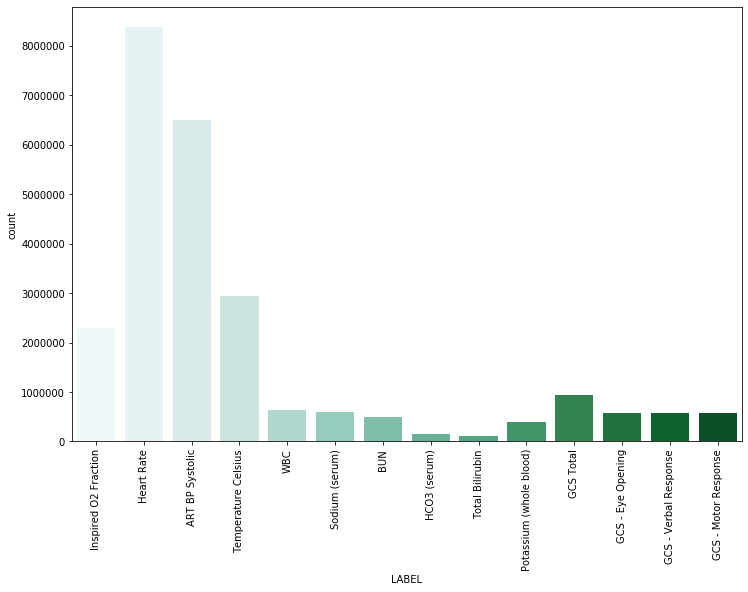

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=charts, x='LABEL', palette='BuGn', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [57]:
charts=charts.pivot_table(values='VALUENUM', index=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME'], columns='LABEL')

In [58]:
charts

LABEL                                                     ART BP Systolic  \
SUBJECT_ID HADM_ID ICUSTAY_ID ITEMID CHARTTIME                              
2          163353  243653.0   211    2138-07-17 20:20:00              NaN   
                                     2138-07-17 20:30:00              NaN   
                                     2138-07-17 21:00:00              NaN   
                                     2138-07-17 22:00:00              NaN   
                              3313   2138-07-17 20:30:00             72.0   
...                                                                   ...   
99999      113369  246512.0   223901 2117-12-31 16:36:00              NaN   
                                     2118-01-01 08:16:00              NaN   
                                     2118-01-01 12:31:00              NaN   
                              225624 2118-01-01 05:35:00              NaN   
                              227443 2118-01-01 05:35:00              NaN   

LABEL                                                      BUN  \
SUBJECT_ID HADM_ID ICUSTAY_ID ITEMID CHARTTIME                   
2          163353  243653.0   211    2138-07-17 20:20:00   NaN   
                                     2138-07-17 20:30:00   NaN   
                                     2138-07-17 21:00:00   NaN   
                                     2138-07-17 22:00:00   NaN   
                              3313   2138-07-17 20:30:00   NaN   
...                                                        ...   
99999      113369  246512.0   223901 2117-12-31 16:36:00   NaN   
                                     2118-01-01 08:16:00   NaN   
                                     2118-01-01 12:31:00   NaN   
                              225624 2118-01-01 05:35:00  15.0   
                              227443 2118-01-01 05:35:00   NaN   

LABEL                                                     GCS - Eye Opening  \
SUBJECT_ID HADM_ID ICUSTAY_ID ITEMID CHARTTIME                                
2          163353  243653.0   211    2138-07-17 20:20:00                NaN   
                                     2138-07-17 20:30:00                NaN   
                                     2138-07-17 21:00:00                NaN   
                                     2138-07-17 22:00:00                NaN   
                              3313   2138-07-17 20:30:00                NaN   
...                                                                     ...   
99999      113369  246512.0   223901 2117-12-31 16:36:00                NaN   
                                     2118-01-01 08:16:00                NaN   
                                     2118-01-01 12:31:00                NaN   
                              225624 2118-01-01 05:35:00                NaN   
                              227443 2118-01-01 05:35:00                NaN   

LABEL                                                     GCS - Motor Response  \
SUBJECT_ID HADM_ID ICUSTAY_ID ITEMID CHARTTIME                                   
2          163353  243653.0   211    2138-07-17 20:20:00                   NaN   
                                     2138-07-17 20:30:00                   NaN   
                                     2138-07-17 21:00:00                   NaN   
                                     2138-07-17 22:00:00                   NaN   
                              3313   2138-07-17 20:30:00                   NaN   
...                                                                        ...   
99999      113369  246512.0   223901 2117-12-31 16:36:00                   6.0   
                                     2118-01-01 08:16:00                   6.0   
                                     2118-01-01 12:31:00                   6.0   
                              225624 2118-01-01 05:35:00                   NaN   
                              227443 2118-01-01 05:35:00                   NaN   

LABEL                                       

In [59]:
def icu_merge(table1, table2):
    return table1.merge(table2, how='left', left_on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'], right_on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'])

In [62]:
charts=icu_merge(charts, icu)

In [64]:
charts.to_csv('charts_f.csv')